Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - loss: 0.2730 - val_loss: 0.1180
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.1112 - val_loss: 0.0963
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - loss: 0.0955 - val_loss: 0.0889
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - loss: 0.0885 - val_loss: 0.0848
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - loss: 0.0847 - val_loss: 0.0821
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - loss: 0.0819 - val_loss: 0.0802
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - loss: 0.0803 - val_loss: 0.0783
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - loss: 0.0787 - val_loss: 0.0774
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - loss: 0.0775 - val_loss: 0.0765
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - loss: 0.0765 - val_loss: 0.0756
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - loss: 0.0754 - val_loss: 0.0752
Epoch 12/20
235/235 ━━━━━━━━━━━━━━

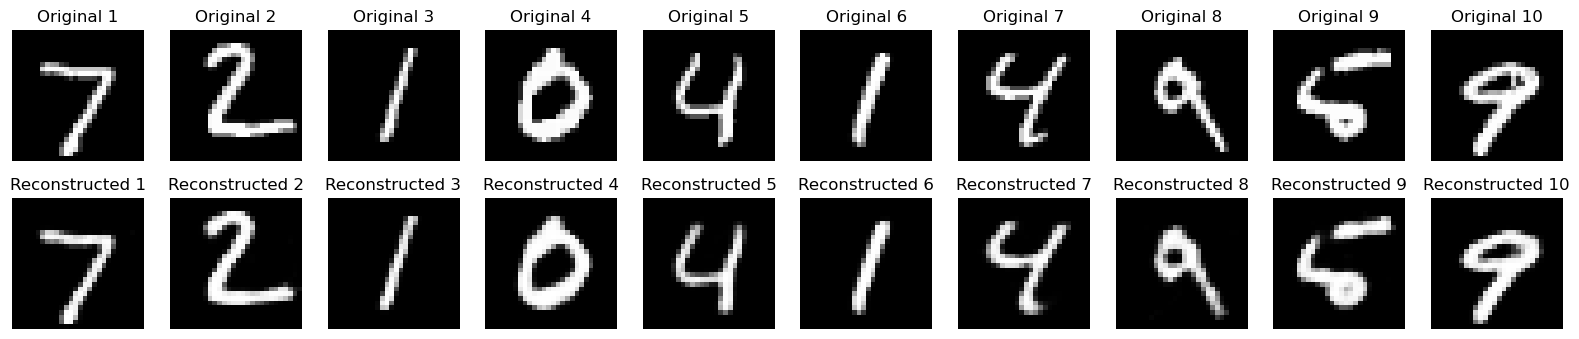

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

input_img = layers.Input(shape=(28*28,))
encoded = layers.Dense(512, activation='relu')(input_img)
encoded = layers.Dense(256, activation='relu')(encoded)
encoded = layers.Dense(128, activation='relu')(encoded)

decoded = layers.Dense(256, activation='relu')(encoded)
decoded = layers.Dense(512, activation='relu')(decoded)
decoded = layers.Dense(28*28, activation='sigmoid')(decoded)

autoencoder = models.Model(input_img, decoded)

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train, epochs=20, batch_size=256, validation_data=(x_test, x_test))

encoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.axis('off')
    ax.set_title(f'Original {i+1}')

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(28, 28), cmap='gray')
    ax.axis('off')
    ax.set_title(f'Reconstructed {i+1}')

plt.show()
